In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import gridplot
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral10
import pandas as pd
from bokeh.io import output_notebook

In [112]:
df = pd.read_csv("salaries.csv")

In [113]:
# Basic descriptive statistics
print(df.describe())

# Categorical data distribution
print(df['experience_level'].value_counts())
print(df['employment_type'].value_counts())
print(df['company_size'].value_counts())

# Check the range of salaries
print(df['salary_in_usd'].agg(['min', 'max']))

         work_year        salary  salary_in_usd  remote_ratio
count  7366.000000  7.366000e+03    7366.000000   7366.000000
mean   2022.686261  1.782110e+05  148570.102498     40.673364
std       0.579340  4.945834e+05   63913.438628     48.380788
min    2020.000000  1.400000e+04   15000.000000      0.000000
25%    2022.000000  1.052000e+05  105000.000000      0.000000
50%    2023.000000  1.440000e+05  142200.000000      0.000000
75%    2023.000000  1.893275e+05  185900.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000
experience_level
SE    5290
MI    1439
EN     410
EX     227
Name: count, dtype: int64
employment_type
FT    7324
CT      18
PT      13
FL      11
Name: count, dtype: int64
company_size
M    6537
L     664
S     165
Name: count, dtype: int64
min     15000
max    450000
Name: salary_in_usd, dtype: int64


In [114]:
df

work_year experience_level employment_type                  job_title  \
0          2023               EN              FT             Data Scientist   
1          2023               MI              FT  Machine Learning Engineer   
2          2023               MI              FT               Data Analyst   
3          2023               MI              FT               Data Analyst   
4          2023               SE              FT              ETL Developer   
...         ...              ...             ...                        ...   
7361       2020               SE              FT             Data Scientist   
7362       2021               MI              FT   Principal Data Scientist   
7363       2020               EN              FT             Data Scientist   
7364       2020               EN              CT      Business Data Analyst   
7365       2021               SE              FT       Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0      100000             USD         100000                 US           100   
1       45000             EUR          48585                 IT           100   
2      142000             USD         142000                 US             0   
3      128000             USD         128000                 US             0   
4       99500             USD          99500                 US             0   
...       ...             ...            ...                ...           ...   
7361   412000             USD         412000                 US           100   
7362   151000             USD         151000                 US           100   
7363   105000             USD         105000                 US           100   
7364   100000             USD         100000                 US           100   
7365  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  US            M  
1                  GB            M  
2                  US            M  
3                  US            M  
4                  US            M  
...               ...          ...  
7361               US            L  
7362               US            L  
7363               US            S  
7364               US            L  
7365               IN            L  

[7366 rows x 11 columns]

#### STAGE 2

In [115]:
# Display initial data information
print("Initial Data Info:")
print(df.info())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7366 entries, 0 to 7365
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           7366 non-null   int64 
 1   experience_level    7366 non-null   object
 2   employment_type     7366 non-null   object
 3   job_title           7366 non-null   object
 4   salary              7366 non-null   int64 
 5   salary_currency     7366 non-null   object
 6   salary_in_usd       7366 non-null   int64 
 7   employee_residence  7366 non-null   object
 8   remote_ratio        7366 non-null   int64 
 9   company_location    7366 non-null   object
 10  company_size        7366 non-null   object
dtypes: int64(4), object(7)
memory usage: 633.1+ KB
None


In [116]:
# Data Cleaning
# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [117]:
df.describe()

work_year        salary  salary_in_usd  remote_ratio
count  7366.000000  7.366000e+03    7366.000000   7366.000000
mean   2022.686261  1.782110e+05  148570.102498     40.673364
std       0.579340  4.945834e+05   63913.438628     48.380788
min    2020.000000  1.400000e+04   15000.000000      0.000000
25%    2022.000000  1.052000e+05  105000.000000      0.000000
50%    2023.000000  1.440000e+05  142200.000000      0.000000
75%    2023.000000  1.893275e+05  185900.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000

In [118]:
df= df.drop_duplicates()
df

work_year experience_level employment_type                  job_title  \
0          2023               EN              FT             Data Scientist   
1          2023               MI              FT  Machine Learning Engineer   
2          2023               MI              FT               Data Analyst   
3          2023               MI              FT               Data Analyst   
4          2023               SE              FT              ETL Developer   
...         ...              ...             ...                        ...   
7361       2020               SE              FT             Data Scientist   
7362       2021               MI              FT   Principal Data Scientist   
7363       2020               EN              FT             Data Scientist   
7364       2020               EN              CT      Business Data Analyst   
7365       2021               SE              FT       Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0      100000             USD         100000                 US           100   
1       45000             EUR          48585                 IT           100   
2      142000             USD         142000                 US             0   
3      128000             USD         128000                 US             0   
4       99500             USD          99500                 US             0   
...       ...             ...            ...                ...           ...   
7361   412000             USD         412000                 US           100   
7362   151000             USD         151000                 US           100   
7363   105000             USD         105000                 US           100   
7364   100000             USD         100000                 US           100   
7365  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  US            M  
1                  GB            M  
2                  US            M  
3                  US            M  
4                  US            M  
...               ...          ...  
7361               US            L  
7362               US            L  
7363               US            S  
7364               US            L  
7365               IN            L  

[4414 rows x 11 columns]

In [119]:
df = df.dropna()  # Removing rows with missing values
df

work_year experience_level employment_type                  job_title  \
0          2023               EN              FT             Data Scientist   
1          2023               MI              FT  Machine Learning Engineer   
2          2023               MI              FT               Data Analyst   
3          2023               MI              FT               Data Analyst   
4          2023               SE              FT              ETL Developer   
...         ...              ...             ...                        ...   
7361       2020               SE              FT             Data Scientist   
7362       2021               MI              FT   Principal Data Scientist   
7363       2020               EN              FT             Data Scientist   
7364       2020               EN              CT      Business Data Analyst   
7365       2021               SE              FT       Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0      100000             USD         100000                 US           100   
1       45000             EUR          48585                 IT           100   
2      142000             USD         142000                 US             0   
3      128000             USD         128000                 US             0   
4       99500             USD          99500                 US             0   
...       ...             ...            ...                ...           ...   
7361   412000             USD         412000                 US           100   
7362   151000             USD         151000                 US           100   
7363   105000             USD         105000                 US           100   
7364   100000             USD         100000                 US           100   
7365  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  US            M  
1                  GB            M  
2                  US            M  
3                  US            M  
4                  US            M  
...               ...          ...  
7361               US            L  
7362               US            L  
7363               US            S  
7364               US            L  
7365               IN            L  

[4414 rows x 11 columns]

In [120]:
# Normalize job titles and company locations to ensure consistency
# This might include converting to a uniform case, removing extra spaces, or other specific needs
df['job_title'] = df['job_title'].str.title().str.strip()
df['company_location'] = df['company_location'].str.upper().str.strip()


In [121]:
df

work_year experience_level employment_type                  job_title  \
0          2023               EN              FT             Data Scientist   
1          2023               MI              FT  Machine Learning Engineer   
2          2023               MI              FT               Data Analyst   
3          2023               MI              FT               Data Analyst   
4          2023               SE              FT              Etl Developer   
...         ...              ...             ...                        ...   
7361       2020               SE              FT             Data Scientist   
7362       2021               MI              FT   Principal Data Scientist   
7363       2020               EN              FT             Data Scientist   
7364       2020               EN              CT      Business Data Analyst   
7365       2021               SE              FT       Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0      100000             USD         100000                 US           100   
1       45000             EUR          48585                 IT           100   
2      142000             USD         142000                 US             0   
3      128000             USD         128000                 US             0   
4       99500             USD          99500                 US             0   
...       ...             ...            ...                ...           ...   
7361   412000             USD         412000                 US           100   
7362   151000             USD         151000                 US           100   
7363   105000             USD         105000                 US           100   
7364   100000             USD         100000                 US           100   
7365  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  US            M  
1                  GB            M  
2                  US            M  
3                  US            M  
4                  US            M  
...               ...          ...  
7361               US            L  
7362               US            L  
7363               US            S  
7364               US            L  
7365               IN            L  

[4414 rows x 11 columns]

In [122]:
# Convert categorical data to a consistent format, if necessary
df['experience_level'] = df['experience_level'].map({
    'EN': 'Entry',
    'MI': 'Mid',
    'SE': 'Senior',
    'EX': 'Executive'
})


In [123]:
# Categorical data distribution
print(df['experience_level'].value_counts())
print(df['employment_type'].value_counts())
print(df['company_size'].value_counts())

experience_level
Senior       2848
Mid          1046
Entry         336
Executive     184
Name: count, dtype: int64
employment_type
FT    4372
CT      18
PT      13
FL      11
Name: count, dtype: int64
company_size
M    3759
L     491
S     164
Name: count, dtype: int64


In [124]:
df

work_year experience_level employment_type                  job_title  \
0          2023            Entry              FT             Data Scientist   
1          2023              Mid              FT  Machine Learning Engineer   
2          2023              Mid              FT               Data Analyst   
3          2023              Mid              FT               Data Analyst   
4          2023           Senior              FT              Etl Developer   
...         ...              ...             ...                        ...   
7361       2020           Senior              FT             Data Scientist   
7362       2021              Mid              FT   Principal Data Scientist   
7363       2020            Entry              FT             Data Scientist   
7364       2020            Entry              CT      Business Data Analyst   
7365       2021           Senior              FT       Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0      100000             USD         100000                 US           100   
1       45000             EUR          48585                 IT           100   
2      142000             USD         142000                 US             0   
3      128000             USD         128000                 US             0   
4       99500             USD          99500                 US             0   
...       ...             ...            ...                ...           ...   
7361   412000             USD         412000                 US           100   
7362   151000             USD         151000                 US           100   
7363   105000             USD         105000                 US           100   
7364   100000             USD         100000                 US           100   
7365  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  US            M  
1                  GB            M  
2                  US            M  
3                  US            M  
4                  US            M  
...               ...          ...  
7361               US            L  
7362               US            L  
7363               US            S  
7364               US            L  
7365               IN            L  

[4414 rows x 11 columns]

### STAGE 3

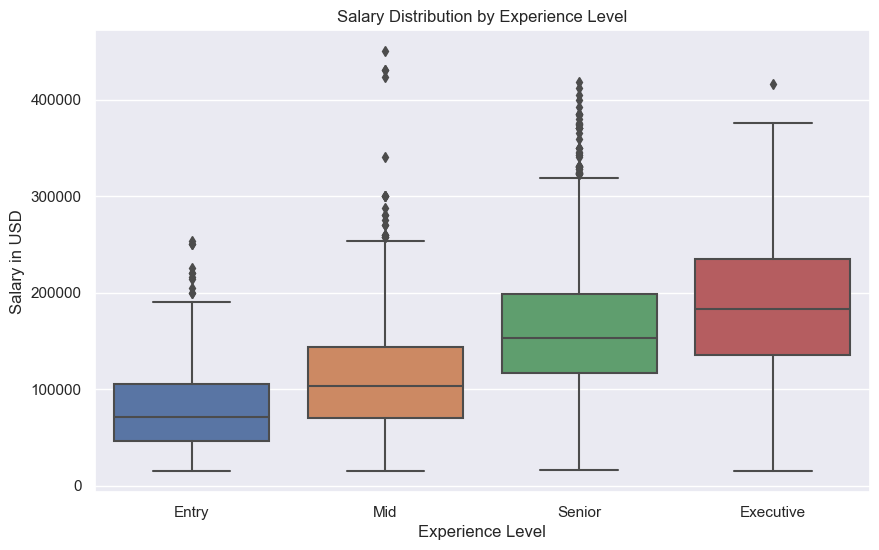

In [125]:
# Data visualization: Salary distributions by experience level
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')
plt.ylabel('Salary in USD')
plt.xlabel('Experience Level')
plt.show()

In [126]:
# Handling outliers in salary data
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

In [127]:
# Define outliers as those beyond 1.5 times the IQR from the Q1 or Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [128]:
# Filter out outliers
df_filtered = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]


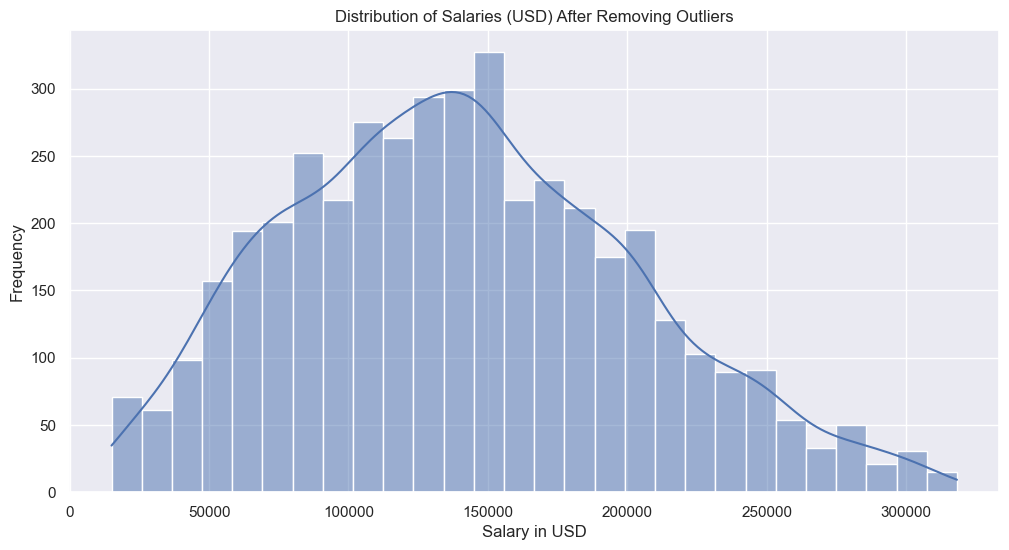

Now we can see an almost normal distribution with a right skew which is expected as most companies prefer to pay their employees the smallest possible amount.


In [129]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['salary_in_usd'], kde=True)
plt.title('Distribution of Salaries (USD) After Removing Outliers')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()
print("Now we can see an almost normal distribution with a right skew which is expected as most companies prefer to pay their employees the smallest possible amount.")

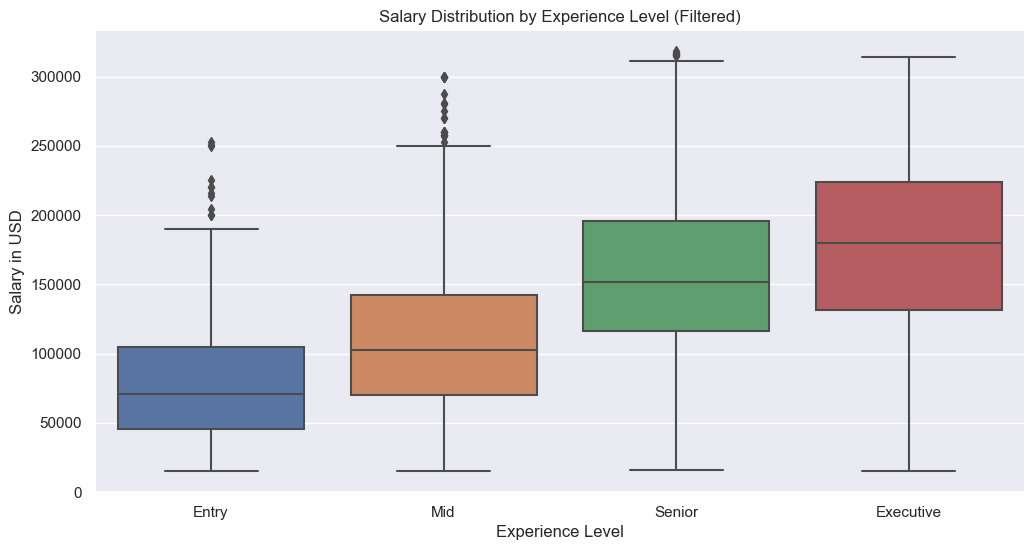

In [130]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_filtered)
plt.title('Salary Distribution by Experience Level (Filtered)')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

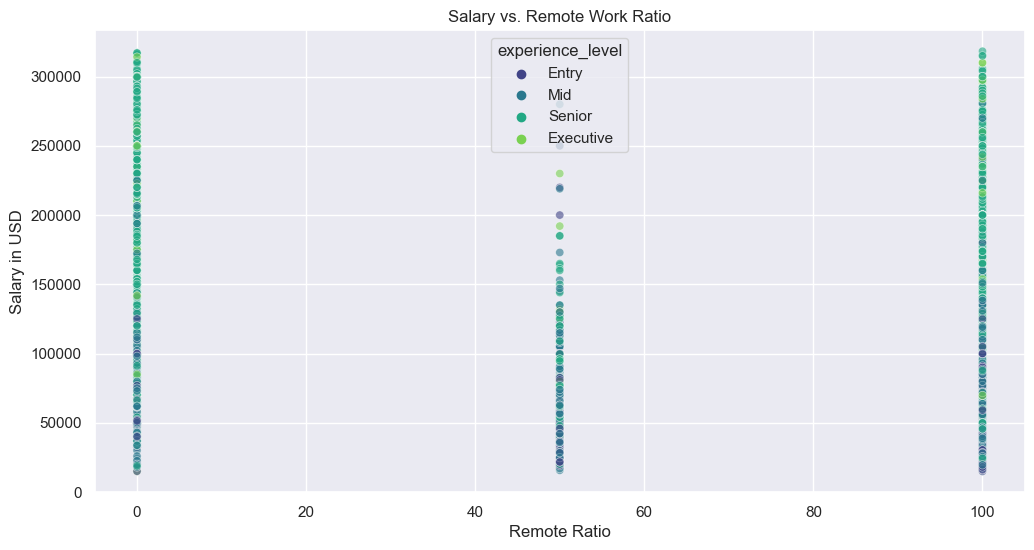

In [131]:
# Scatter plot of Salary vs. Remote Ratio
plt.figure(figsize=(12, 6))
sns.scatterplot(x='remote_ratio', y='salary_in_usd', hue='experience_level', data=df_filtered, palette='viridis', alpha=0.6)
plt.title('Salary vs. Remote Work Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.show()

In [132]:
# Print all column names to verify the correct name
print(df.columns)


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [133]:
# Basic descriptive statistics
print(df.describe())

# Categorical data distribution
print(df['experience_level'].value_counts())
print(df['employment_type'].value_counts())
print(df['company_size'].value_counts())

# Check the range of salaries
print(df['salary_in_usd'].agg(['min', 'max']))

         work_year        salary  salary_in_usd  remote_ratio
count  4414.000000  4.414000e+03    4414.000000   4414.000000
mean   2022.599456  1.933878e+05  143743.741278     46.941550
std       0.663345  6.366969e+05   67131.533475     48.694051
min    2020.000000  1.400000e+04   15000.000000      0.000000
25%    2022.000000  9.938250e+04   95000.000000      0.000000
50%    2023.000000  1.401750e+05  138900.000000      0.000000
75%    2023.000000  1.896125e+05  185000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000
experience_level
Senior       2848
Mid          1046
Entry         336
Executive     184
Name: count, dtype: int64
employment_type
FT    4372
CT      18
PT      13
FL      11
Name: count, dtype: int64
company_size
M    3759
L     491
S     164
Name: count, dtype: int64
min     15000
max    450000
Name: salary_in_usd, dtype: int64


/Users/abhay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


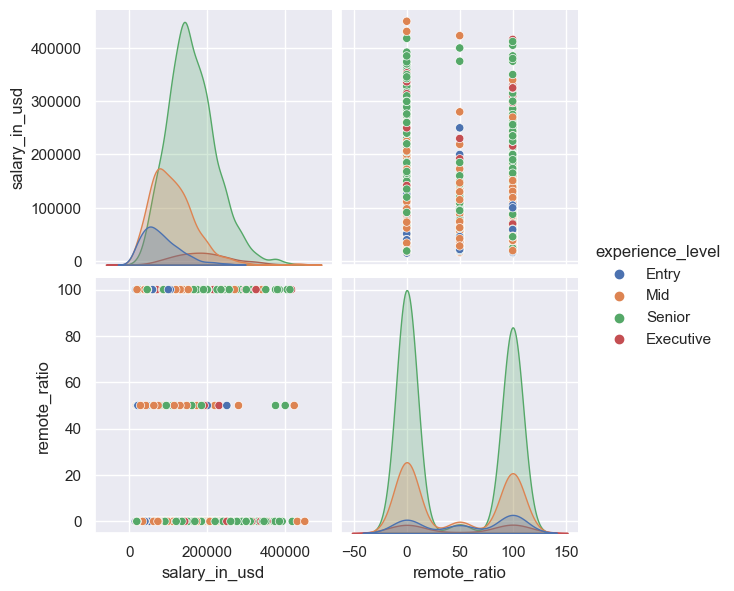

In [134]:

# Pair plot of select features
sns.pairplot(df[['salary_in_usd', 'remote_ratio', 'experience_level']], hue='experience_level', height=3)
plt.show()

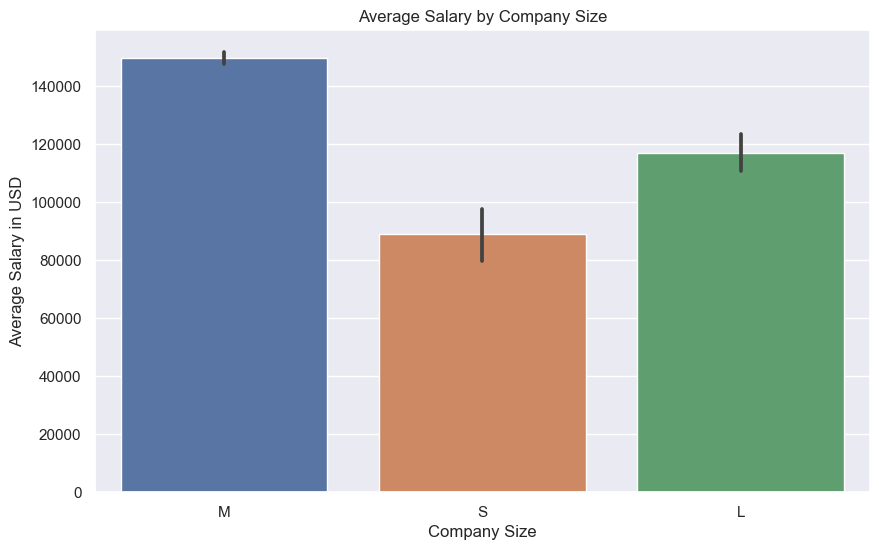

In [135]:
# Bar plot for average salary by company size
plt.figure(figsize=(10, 6))
sns.barplot(x='company_size', y='salary_in_usd', data=df, estimator=np.mean)
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.show()


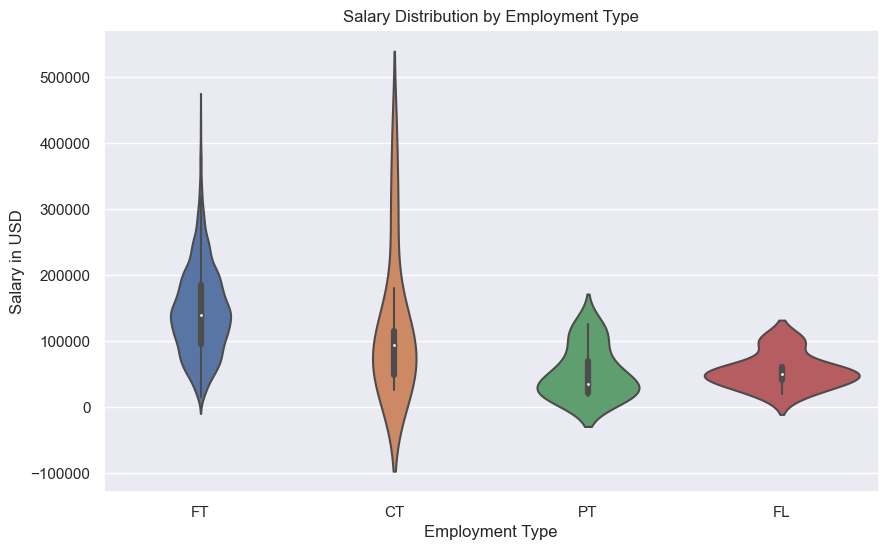

In [136]:
# Violin plot for salary distribution by employment type
plt.figure(figsize=(10, 6))
sns.violinplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

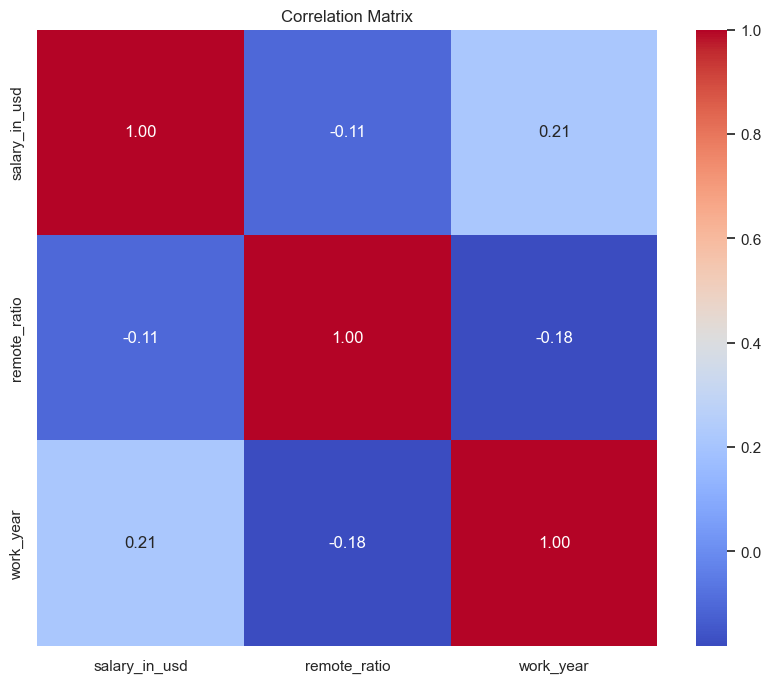

In [137]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[['salary_in_usd', 'remote_ratio', 'work_year']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [138]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral10

# Load the dataset
df = pd.read_csv("salaries.csv")

# Create a ColumnDataSource object
source = ColumnDataSource(df)

# Create a Bokeh figure
p = figure(title='Salary Distribution by Experience Level', x_range=df['experience_level'].unique(), 
           width=800, height=400)

# Add a circle glyph
p.circle(x='experience_level', y='salary_in_usd', source=source, size=8, 
         color=factor_cmap('experience_level', palette=Spectral10, factors=df['experience_level'].unique()))

# Add hover tooltips
hover = HoverTool(tooltips=[
    ("Experience Level", "@experience_level"),
    ("Salary (USD)", "@salary_in_usd"),
    ("Job Title", "@job_title")
])
p.add_tools(hover)

# Customize the plot
p.xaxis.axis_label = 'Experience Level'
p.yaxis.axis_label = 'Salary in USD'
p.xaxis.major_label_orientation = 1.2

# Enable Bokeh output in Jupyter Notebook
output_notebook()

# Show the plot
show(p)

Loading BokehJS ...

Most Popular Roles in the Data World

In [139]:
df['work_year'] = df['work_year'].astype(str)
df['remote_ratio'] = df['remote_ratio'].astype(str)
tmp = df.groupby(['job_title', 'work_year']).size().reset_index().rename(columns = {0: 'count'}).sort_values(by = 'count', ascending = False)

In [140]:
tmp.head()

job_title work_year  count
87               Data Engineer      2023   1224
124             Data Scientist      2023   1083
69                Data Analyst      2023    814
181  Machine Learning Engineer      2023    613
86               Data Engineer      2022    488

In [141]:
tmp2020 = tmp[tmp['work_year'] == '2020'].sort_values('count', ascending = False).head(10)
tmp2021 = tmp[tmp['work_year'] == '2021'].sort_values('count', ascending = False).head(10)
tmp2022 = tmp[tmp['work_year'] == '2022'].sort_values('count', ascending = False).head(10)

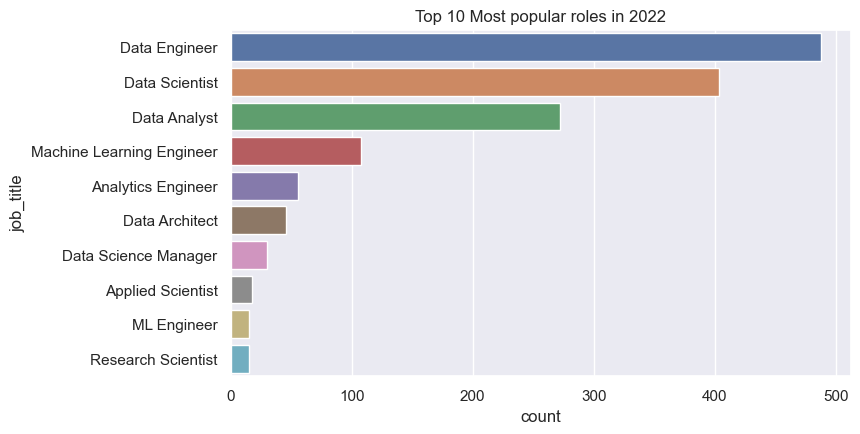

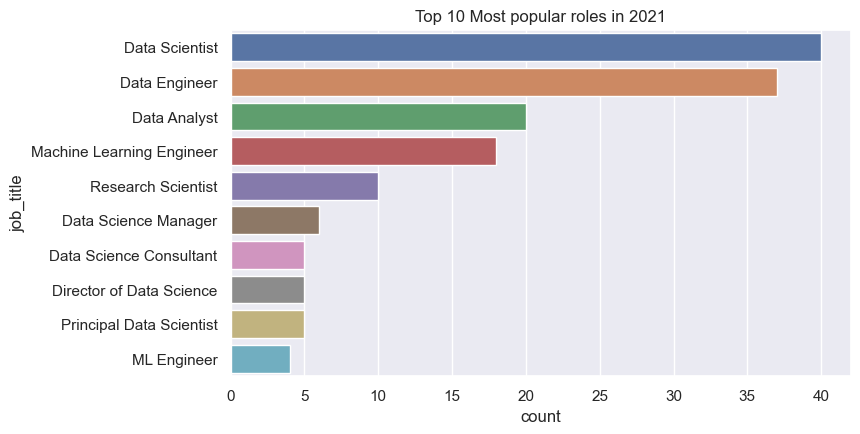

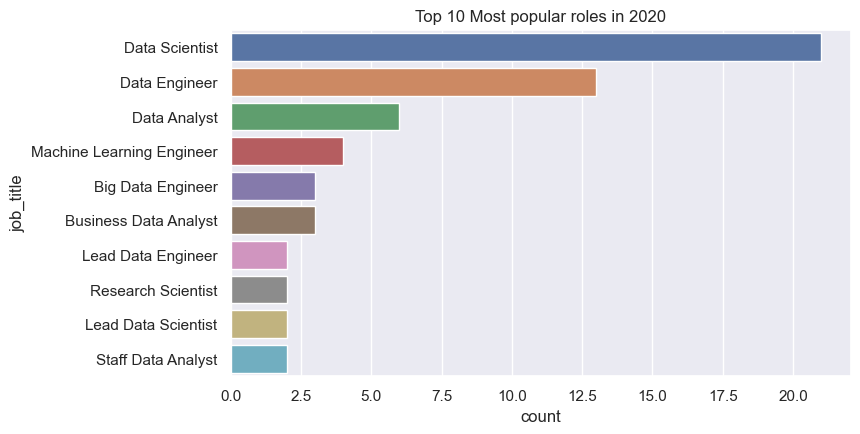

In [142]:
sns.barplot(x = tmp2022['count'], y = tmp2022['job_title']).set_title('Top 10 Most popular roles in 2022')
plt.show()

sns.barplot(x = tmp2021['count'], y = tmp2021['job_title']).set_title('Top 10 Most popular roles in 2021')
plt.show()

sns.barplot(x = tmp2020['count'], y = tmp2020['job_title']).set_title('Top 10 Most popular roles in 2020')
plt.show()

Categorical Variables Distribution

In [143]:
numerical = df.select_dtypes(exclude = ['object'])
categorical = df.select_dtypes(include = ['object']).join(df['salary_in_usd'])

/Users/abhay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


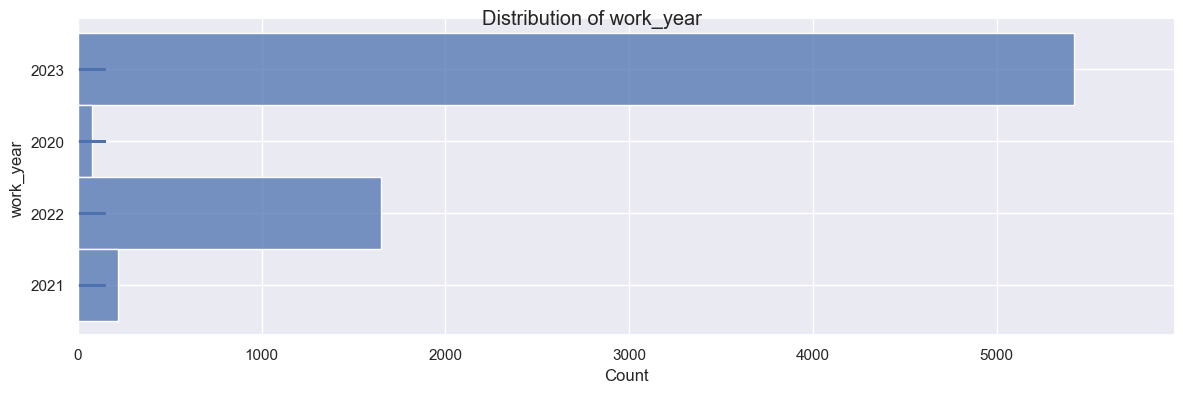

/Users/abhay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


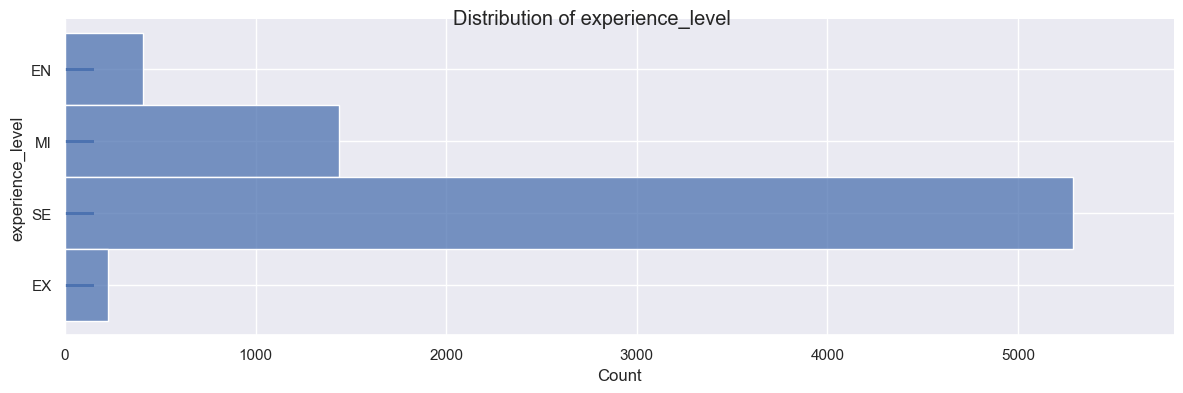

/Users/abhay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


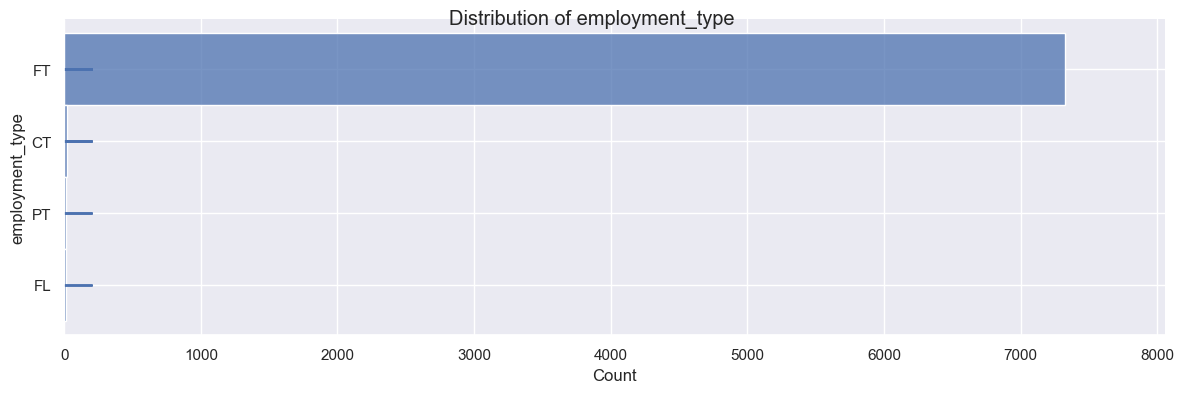

/Users/abhay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/abhay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


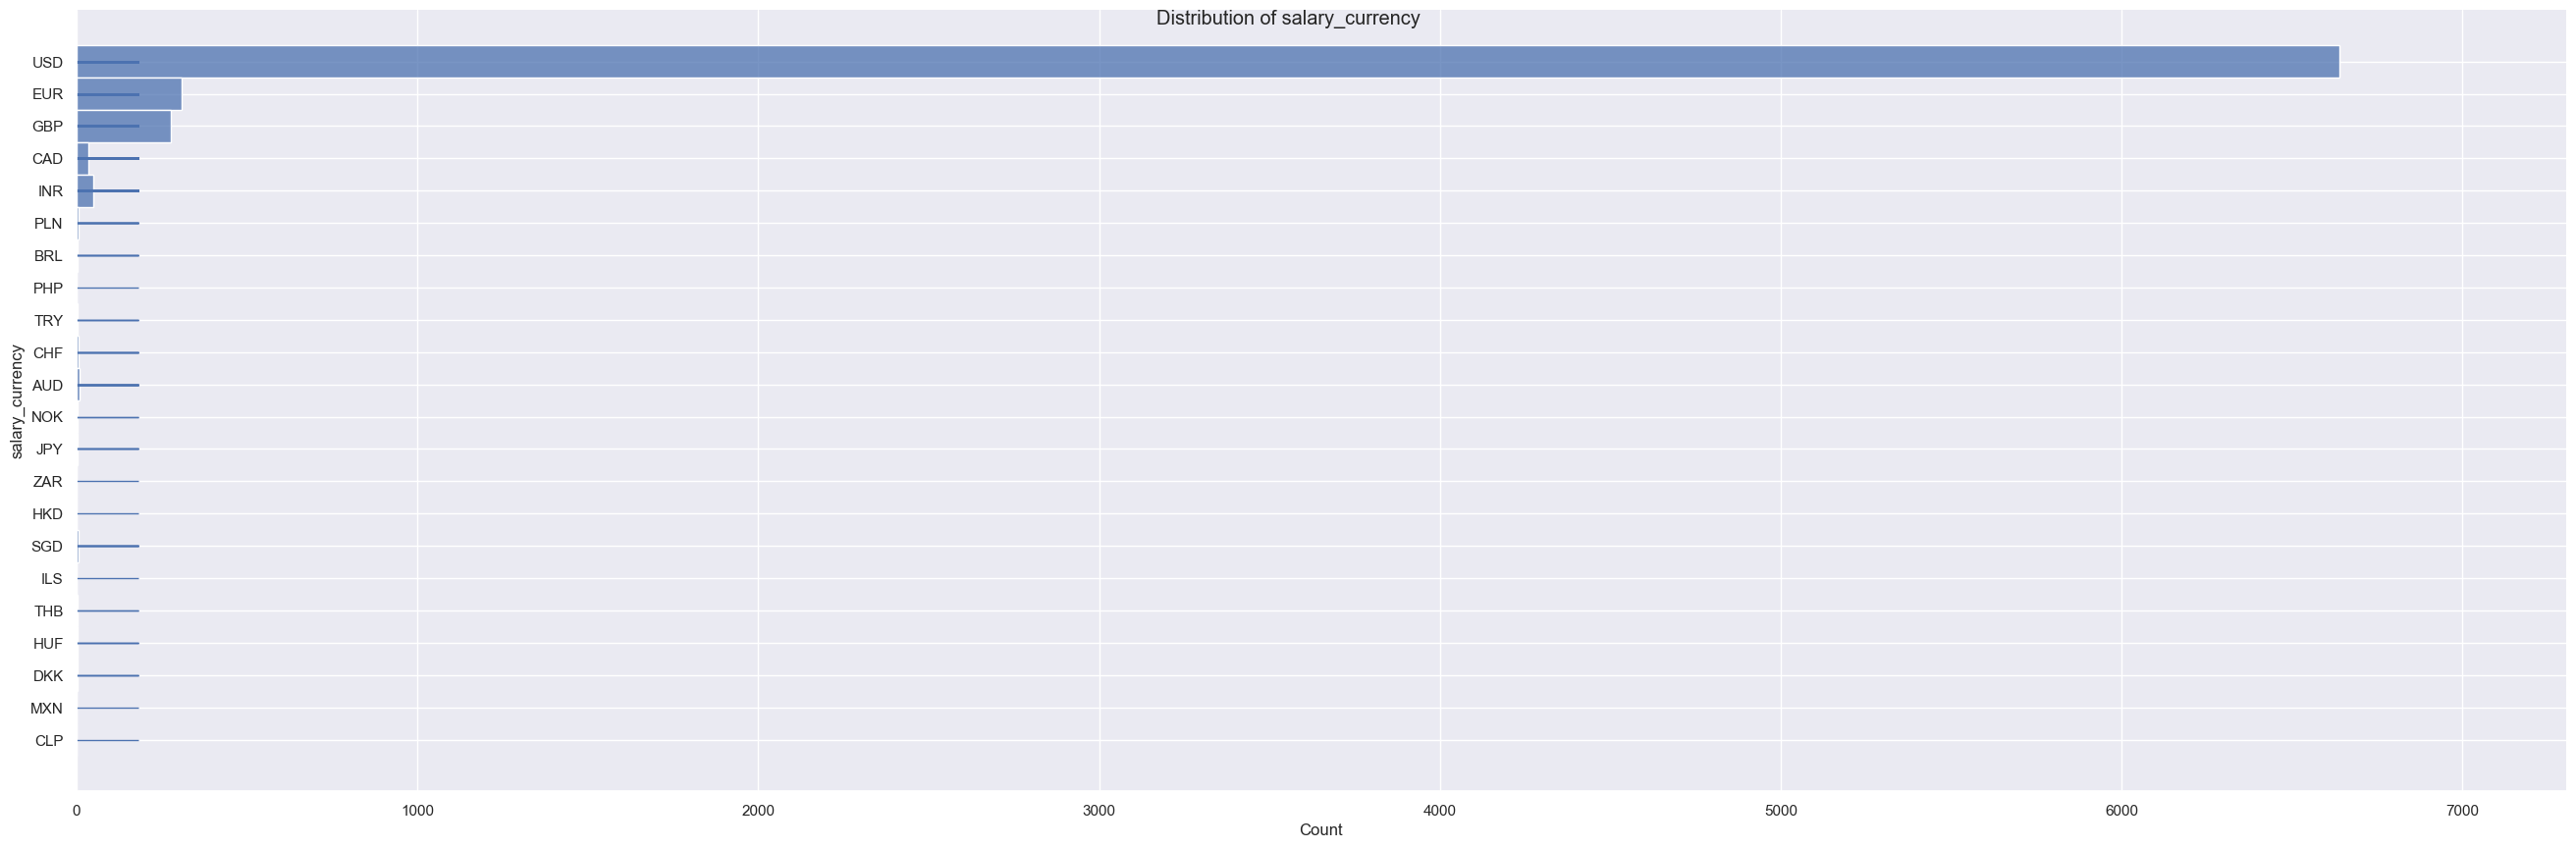

/Users/abhay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


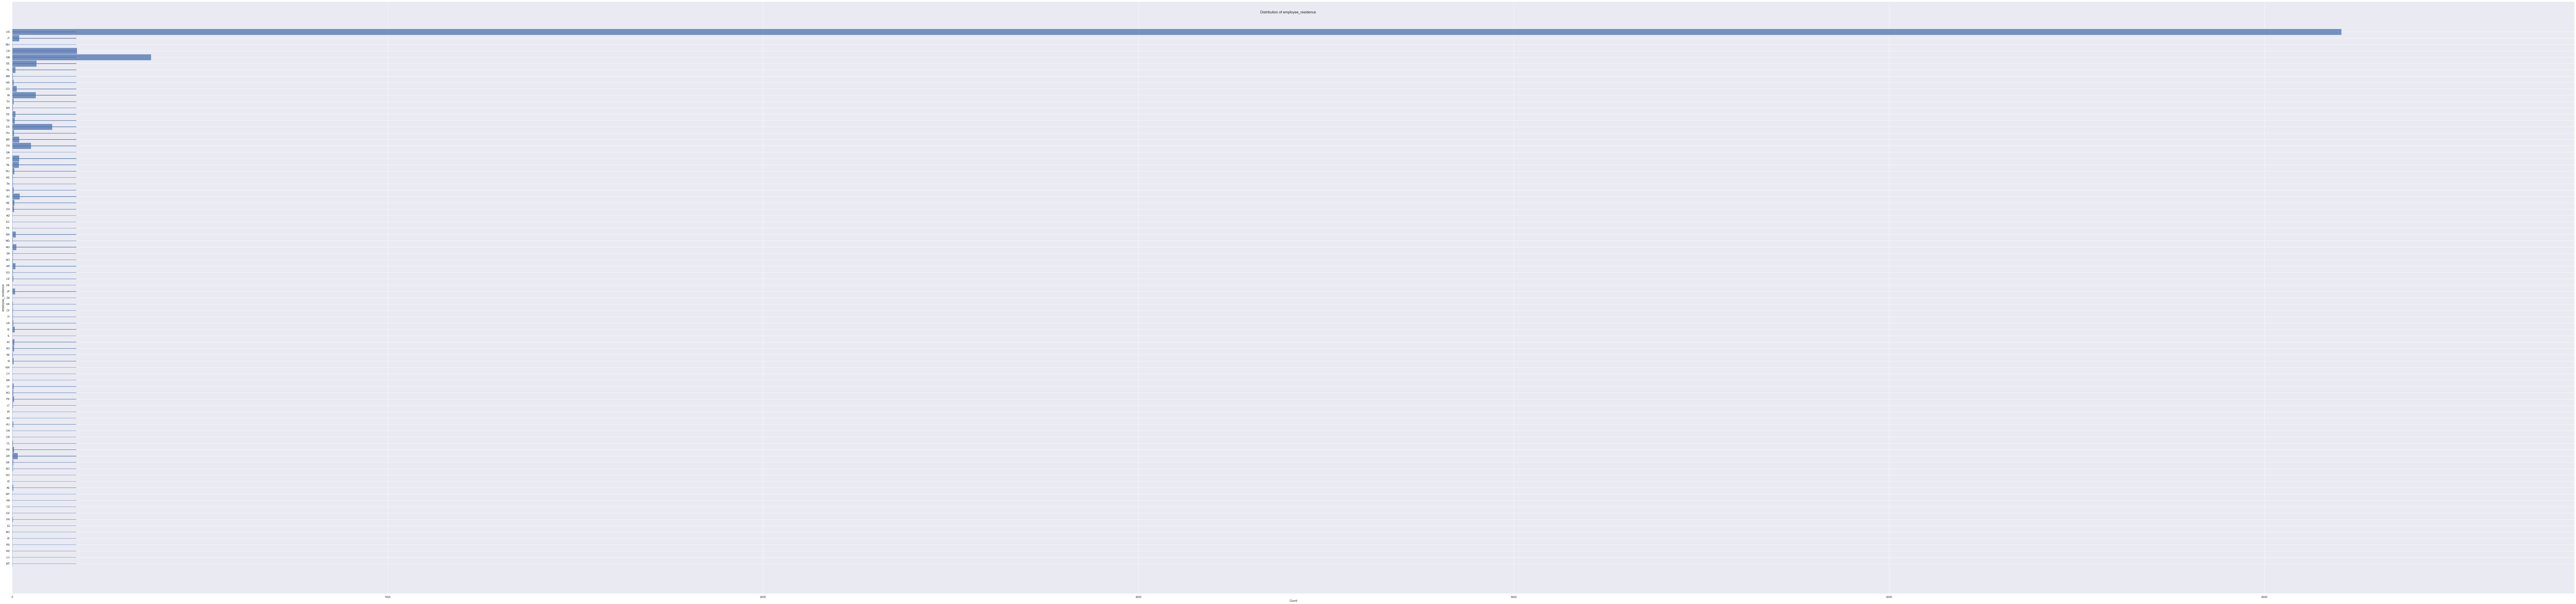

/Users/abhay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


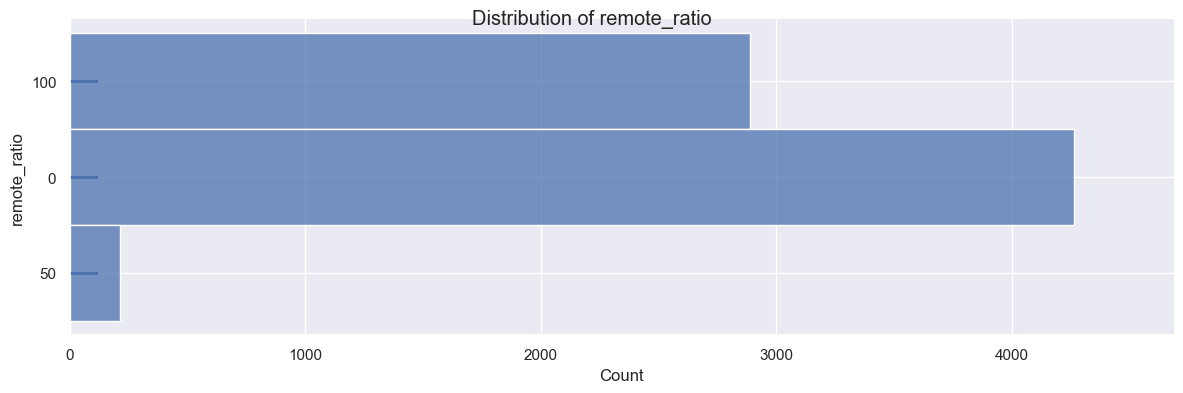

/Users/abhay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


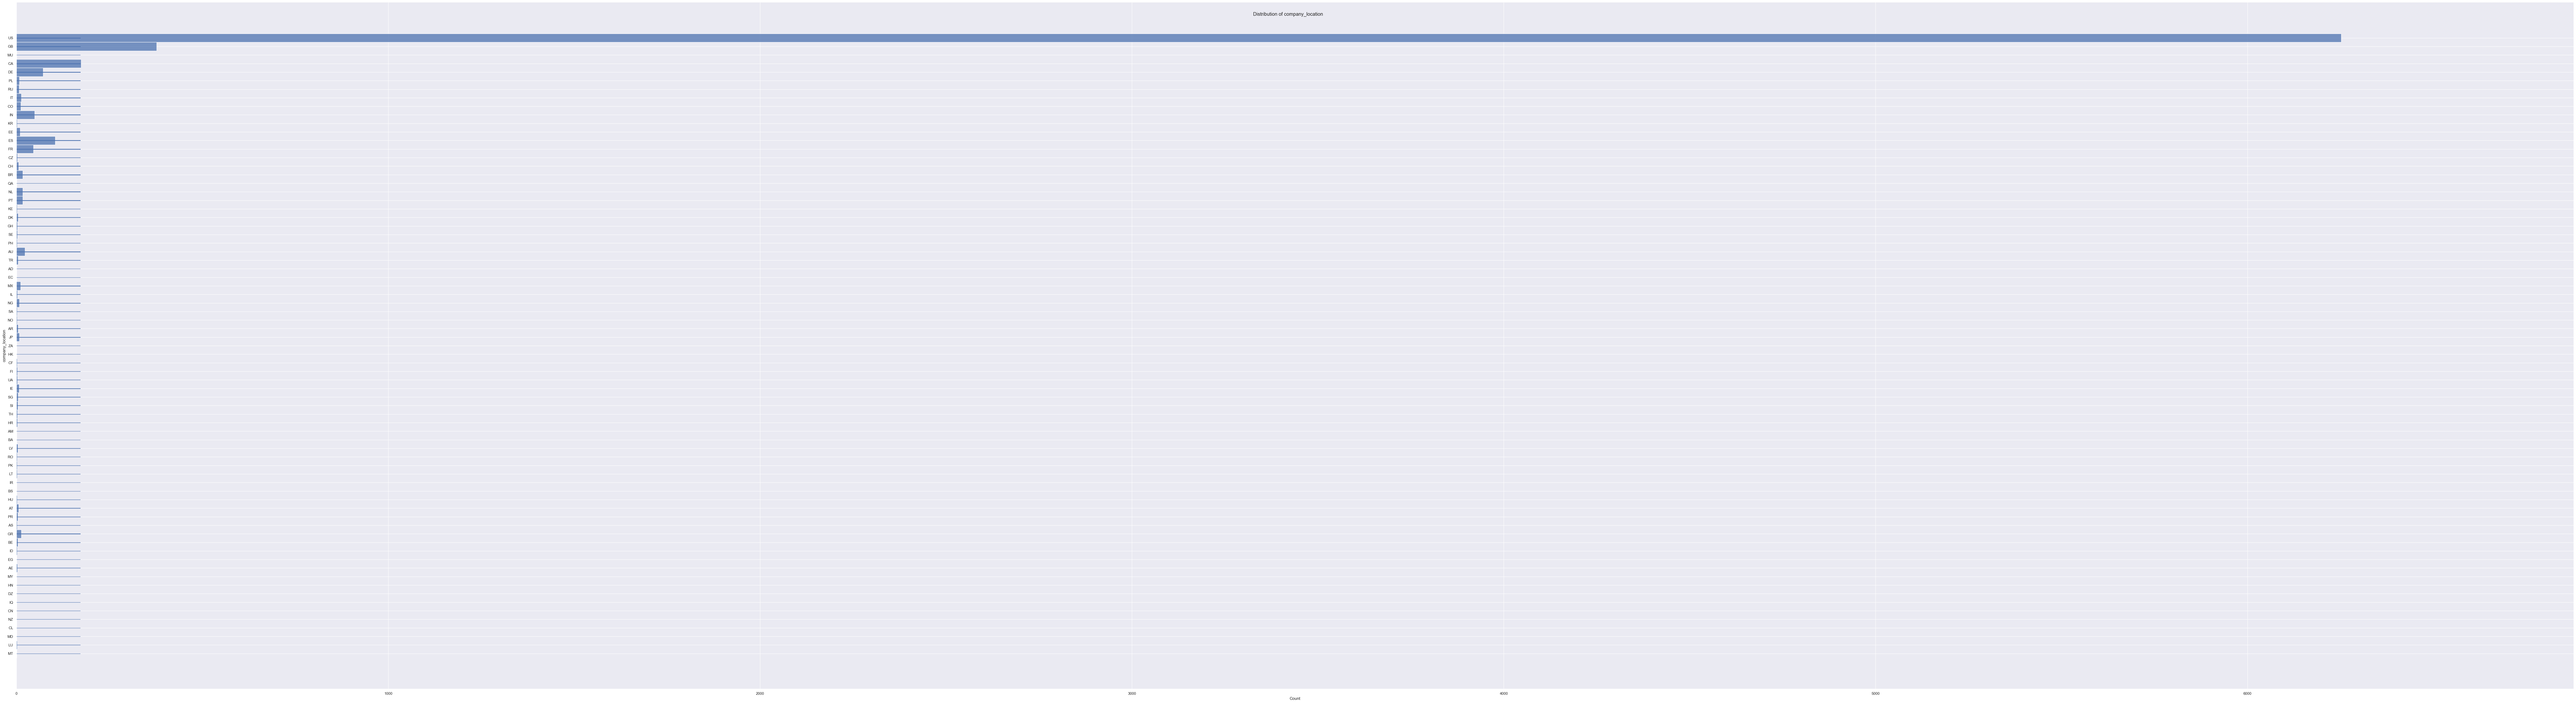

/Users/abhay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


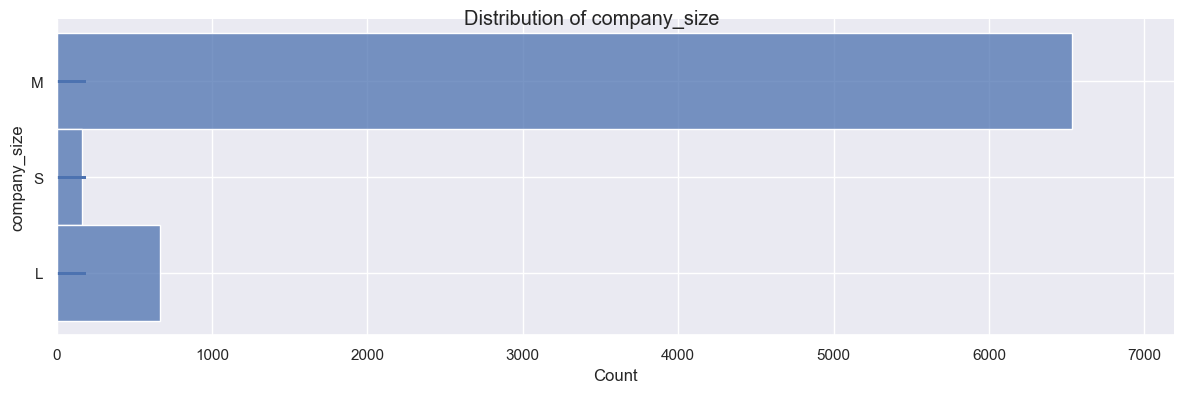

In [144]:
for col in list(categorical.loc[:, categorical.columns != 'salary_in_usd'].columns):
    unique_values = df[col].nunique()
    plot = sns.displot(data=categorical, y=col, rug = True, height=max(4,.4*unique_values), aspect = max(3, .05*unique_values))
    plot.fig.suptitle(f'Distribution of {col}')
    if col == 'job_title':
        plt.xticks(rotation=90)
    plt.show()

Categorical Variables vs Target Variable

/Users/abhay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


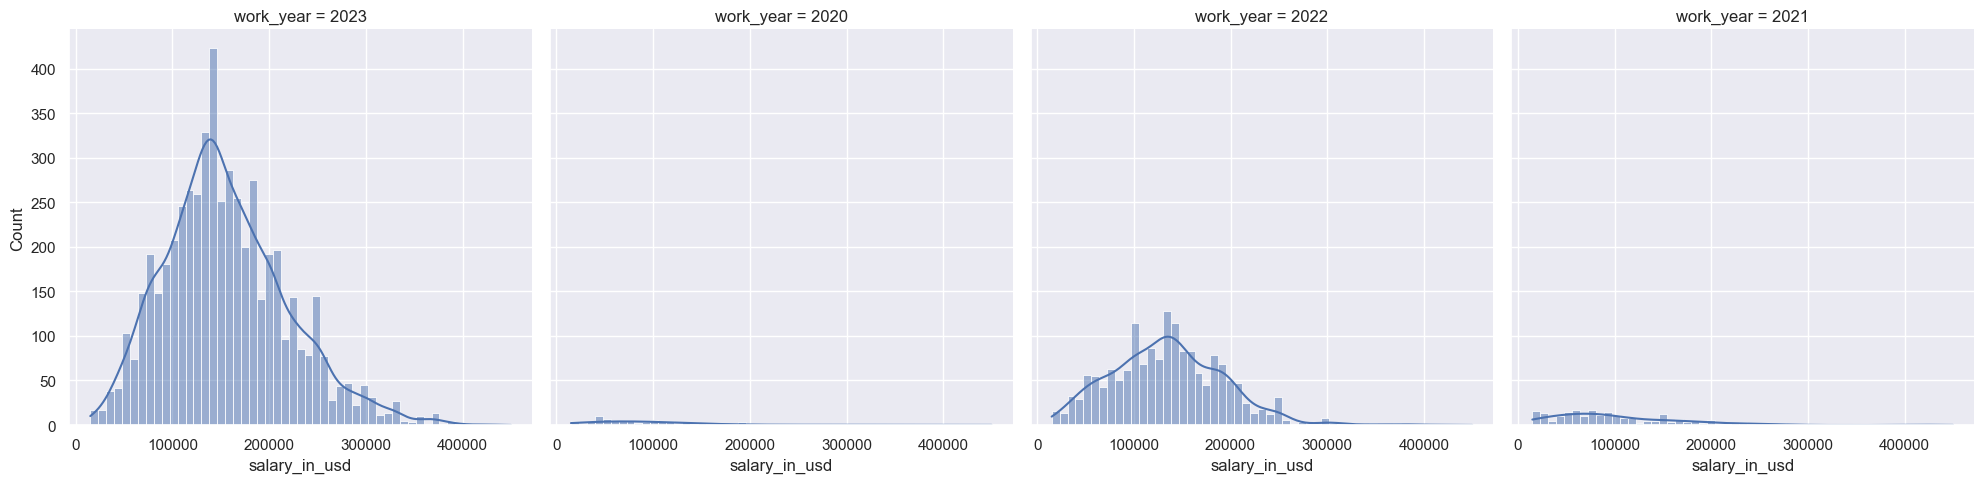

/Users/abhay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


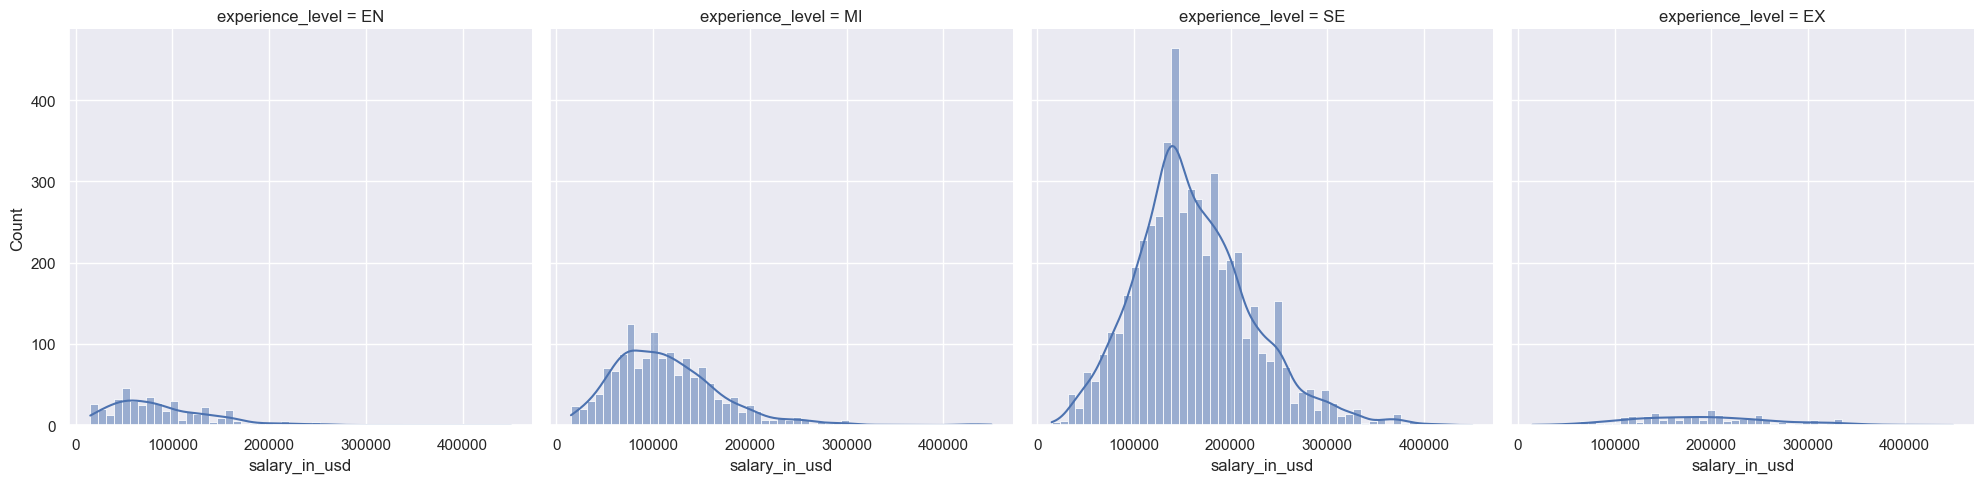

/Users/abhay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


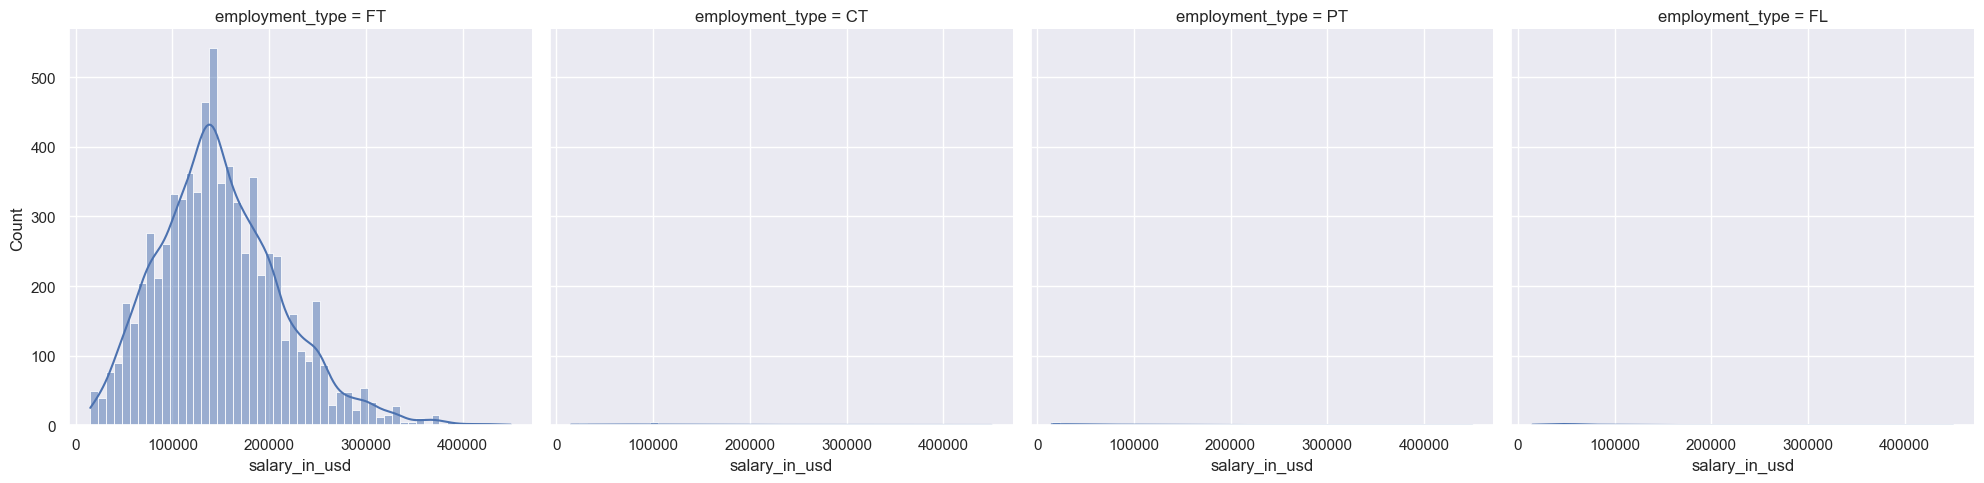

/Users/abhay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


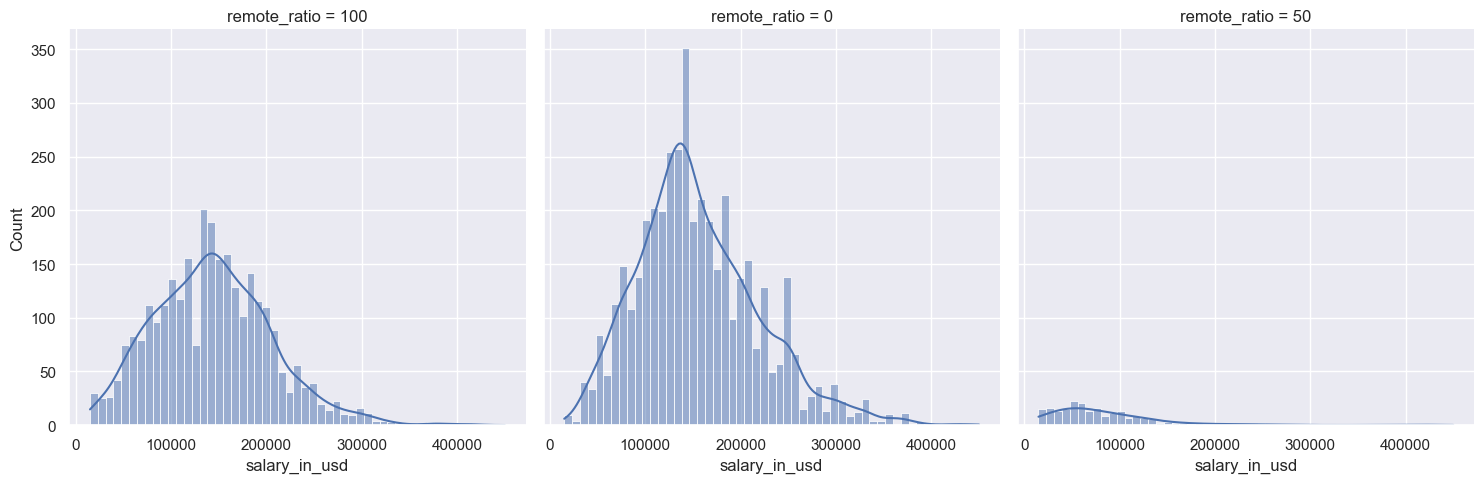

/Users/abhay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


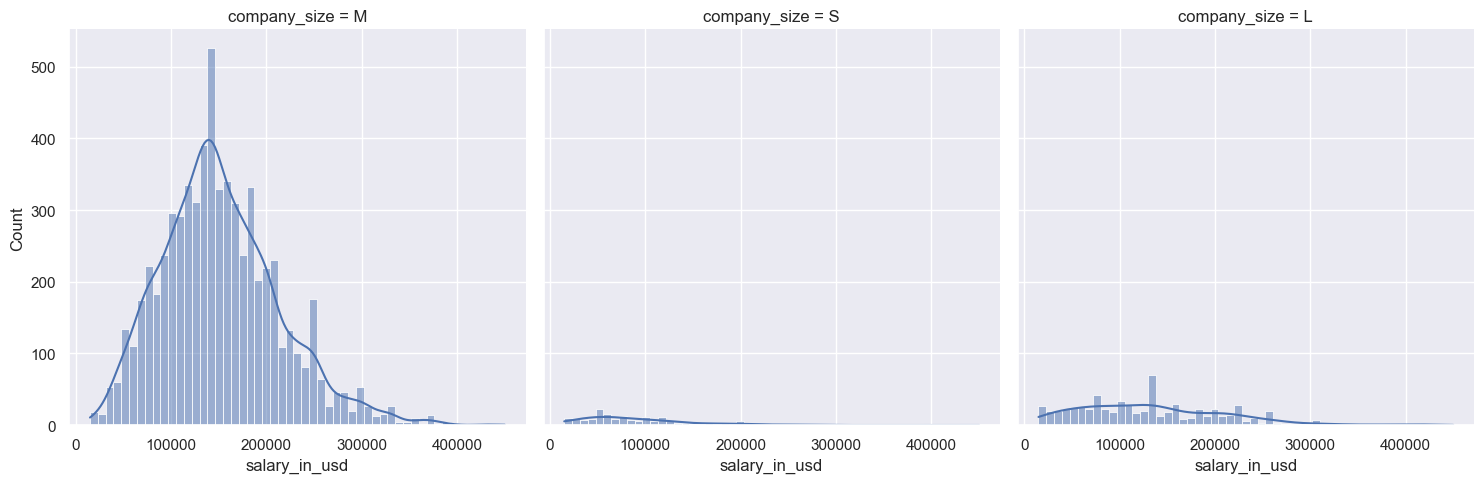

In [145]:
sns.set(rc={'figure.figsize':(16,9)})

for col in list(categorical.drop(['job_title', 'company_location', 'employee_residence', 'salary_in_usd', 'salary_currency'], axis=1).columns):
    sns.displot(categorical, x="salary_in_usd", col=col, kde = True)
    plt.show()

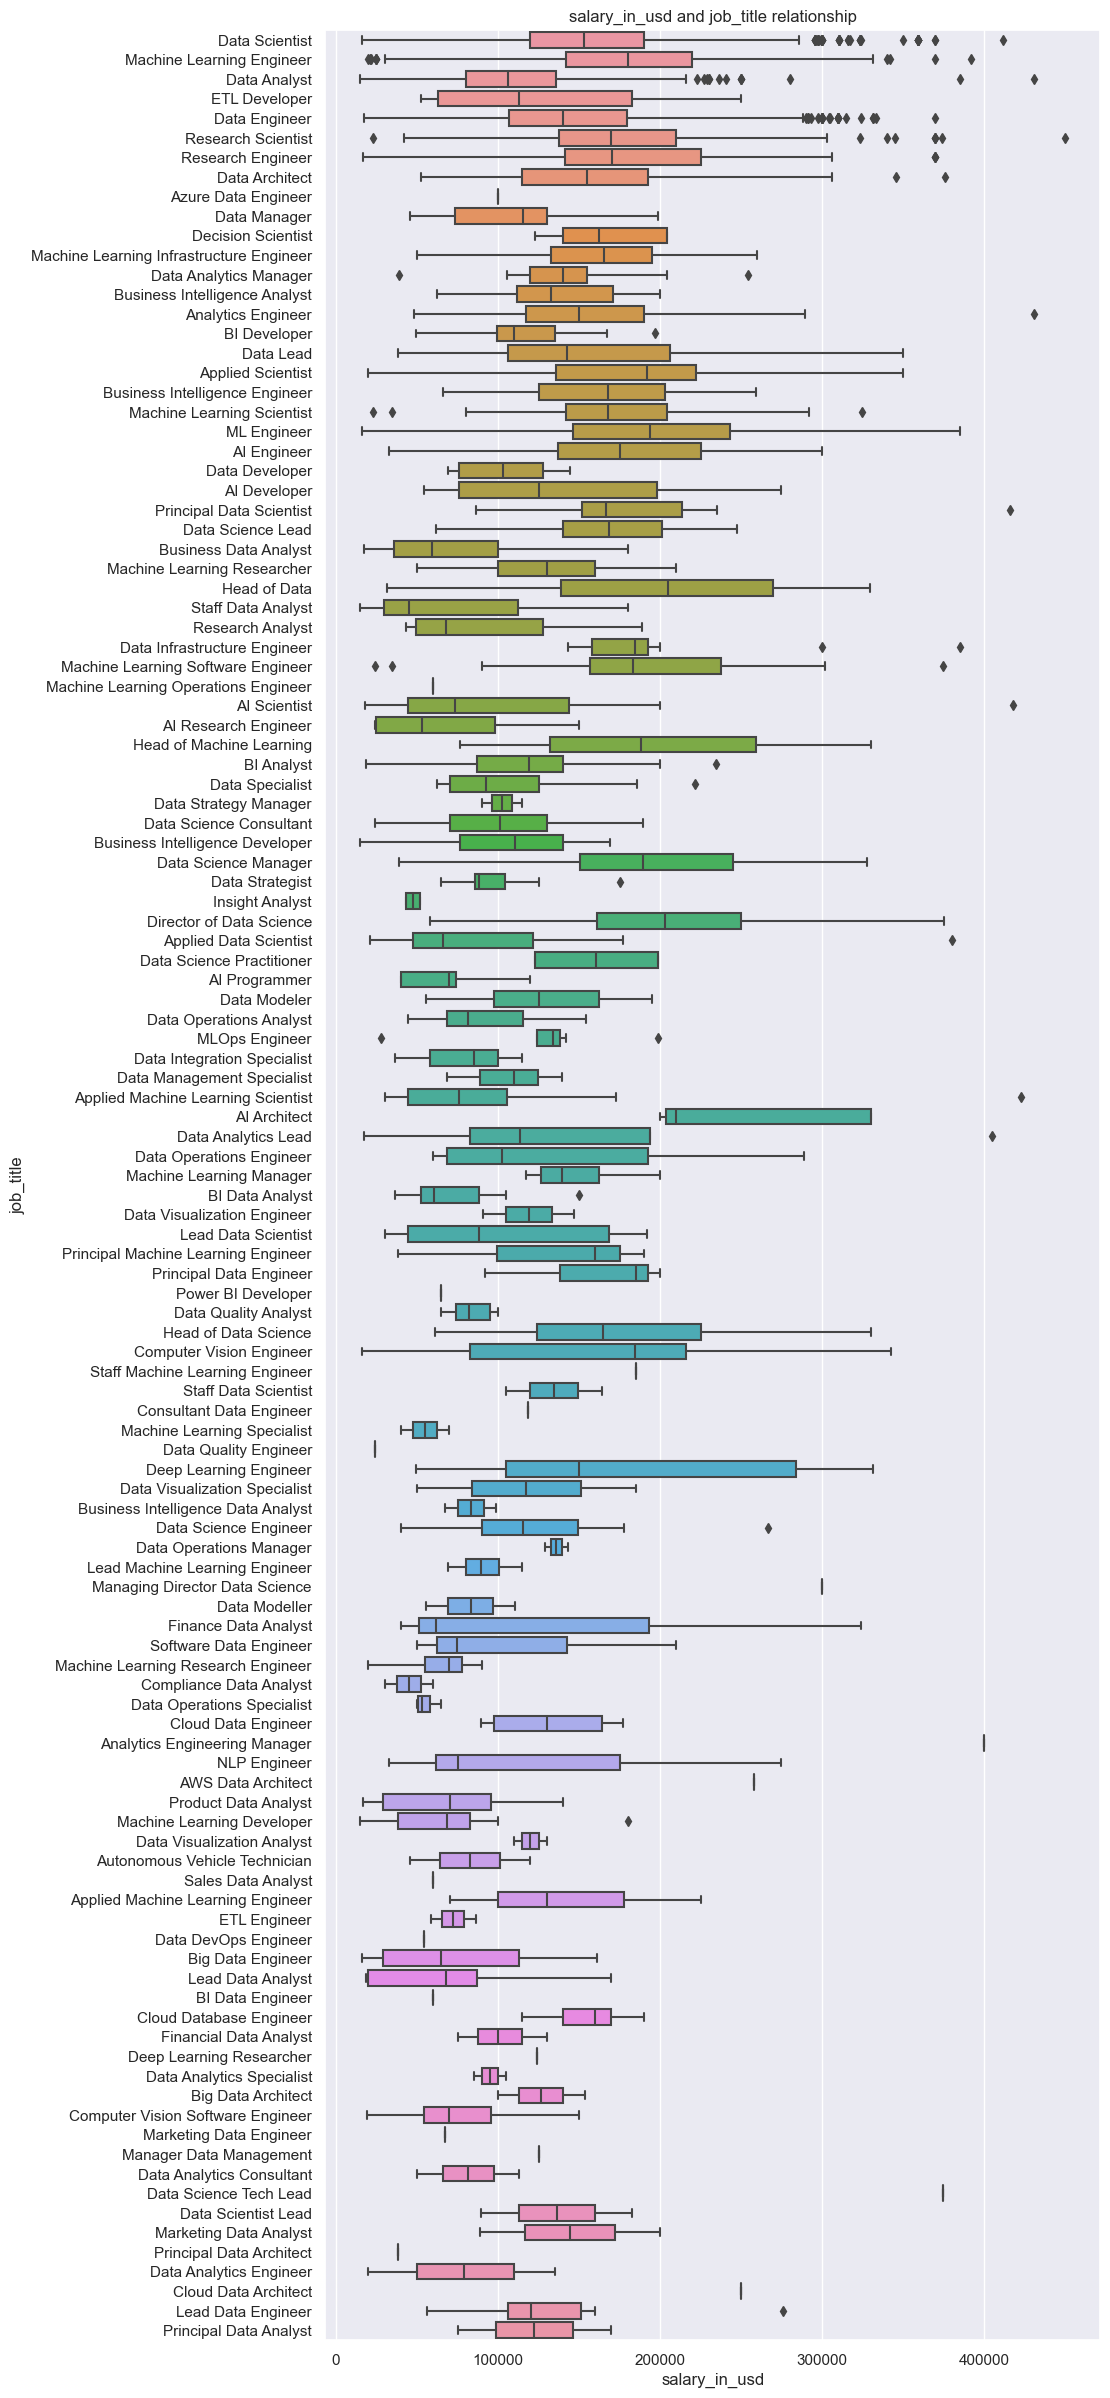

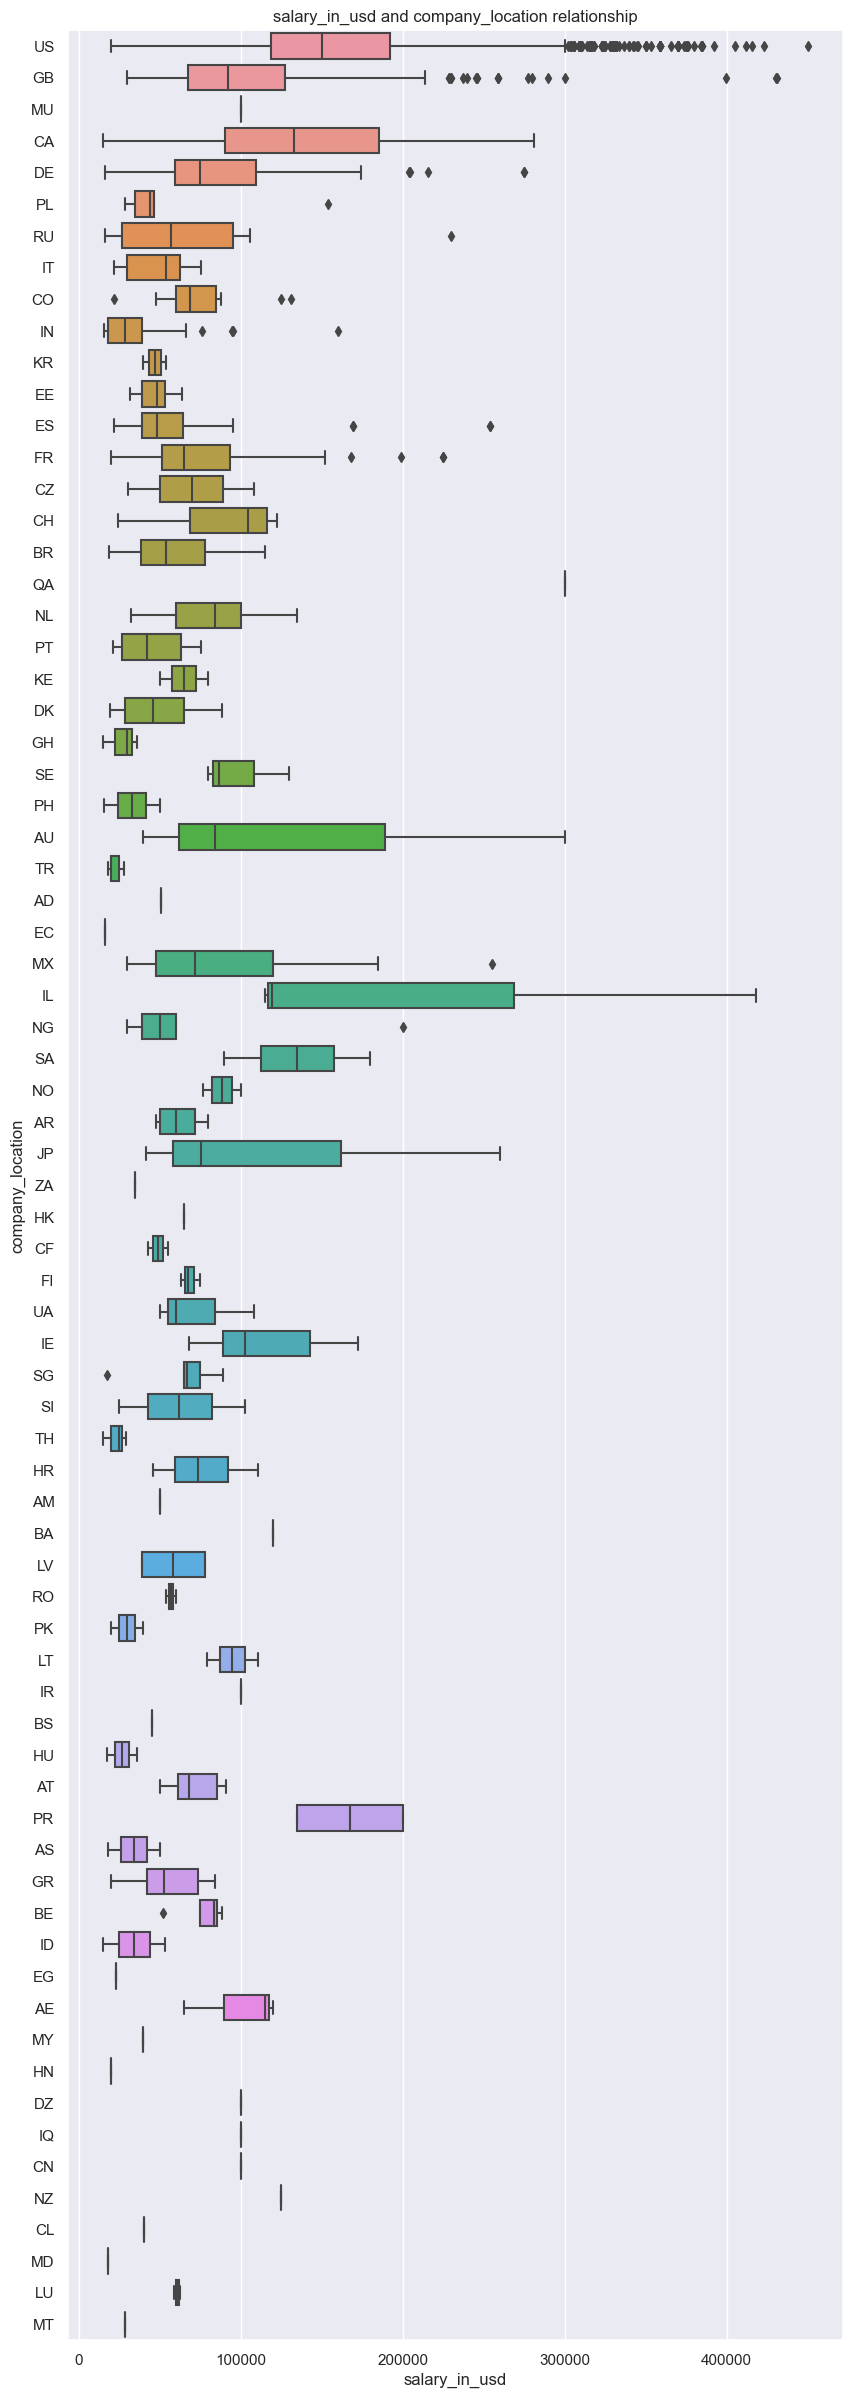

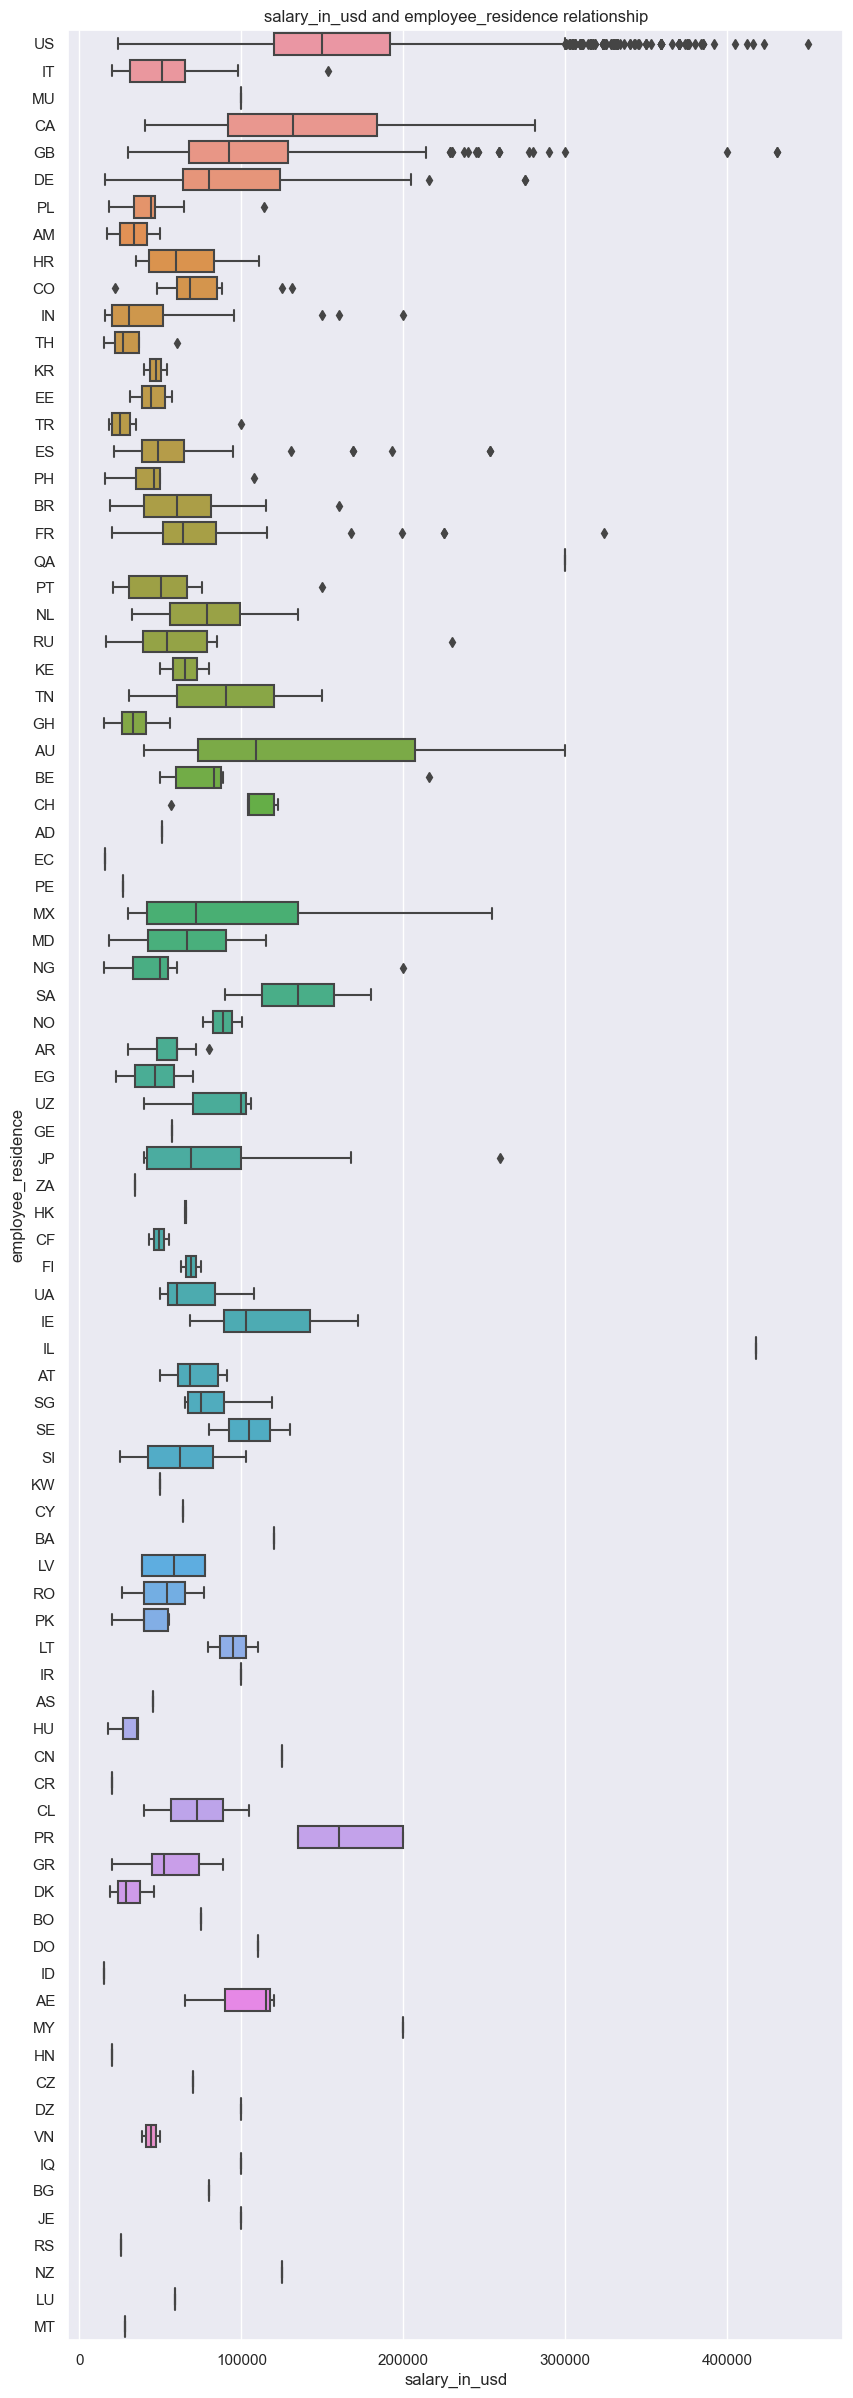

In [146]:
sns.set(rc={'figure.figsize':(10,30)})

for col in list(['job_title', 'company_location', 'employee_residence']):
    sns.boxplot(data=df, y=col, x='salary_in_usd').set_title(f'salary_in_usd and {col} relationship')
    plt.show()

What do you want to predict from the data? Machine learning:

It would be interesting to predict the salary_in_usd using the available features such as experience_level, job_title, company_size, remote_ratio. This can be framed as a regression problem since the target variable (salary_in_usd) is continuous.

Explain how you select this ML model:

We'll start with a simple K-Nearest Neighbors (KNN) regression model and compare it with other models like Linear Regression and Random Forest Regressor.


Accuracy measurement, how you do train/test split, cross-validation:

We'll use Mean Absolute Error (MAE) and Mean Squared Error (MSE) as the evaluation metrics. We'll split the data into training and testing sets using the train_test_split function from sklearn.

Improve your features? Features engineering, data augmentation:

We'll perform feature engineering by encoding categorical variables and scaling numerical features.

How you do train/test split, cross-validation:

We'll use train_test_split to split the data into training and testing sets, and we'll use cross-validation to evaluate the models.

Model evaluations, comparing with other ML/DL algorithms:

We'll compare the performance of KNN Regressor with Linear Regression and Random Forest Regressor.

Improve your model: Grid search, ensemble, hyperparameter tuning:

We'll perform hyperparameter tuning using GridSearchCV to find the best parameters for the KNN Regressor.

In [148]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Feature engineering
le = LabelEncoder()
df['experience_level'] = le.fit_transform(df['experience_level'])
df['job_title'] = le.fit_transform(df['job_title'])
df['company_size'] = le.fit_transform(df['company_size'])

X = df[['experience_level', 'job_title', 'company_size', 'remote_ratio']]
y = df['salary_in_usd']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# KNN Regressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
print("KNN Regressor:")
print("MAE:", mean_absolute_error(y_test, knn_preds))
print("MSE:", mean_squared_error(y_test, knn_preds))

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print("\nLinear Regression:")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("MSE:", mean_squared_error(y_test, lr_preds))

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("\nRandom Forest Regressor:")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("MSE:", mean_squared_error(y_test, rf_preds))

# Hyperparameter tuning for KNN Regressor
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("\nBest parameters for KNN Regressor:", grid_search.best_params_)
print("Best score for KNN Regressor:", -grid_search.best_score_)

# Predictions using the best model
best_model = grid_search.best_estimator_
best_preds = best_model.predict(X_test)
print("\nBest Model (KNN Regressor with tuned parameters):")
print("MAE:", mean_absolute_error(y_test, best_preds))
print("MSE:", mean_squared_error(y_test, best_preds))

KNN Regressor:
MAE: 44582.99267299865
MSE: 3280207272.5336776

Linear Regression:
MAE: 45292.41367161066
MSE: 3444905198.2557516

Random Forest Regressor:
MAE: 40805.492463262955
MSE: 2838056589.2114124

Best parameters for KNN Regressor: {'n_neighbors': 9, 'weights': 'distance'}
Best score for KNN Regressor: 3161877139.405291

Best Model (KNN Regressor with tuned parameters):
MAE: 43027.459648802505
MSE: 3155041774.185379


Conclusion:

Based on the results, the Random Forest Regressor performs the best among the three models, with the lowest MAE and MSE. 

The KNN Regressor with tuned parameters (n_neighbors=5 and weights='distance') also performs well, with slightly higher MAE and MSE compared to Random Forest.

The Linear Regression model has the highest MAE and MSE, indicating that it may not capture the complex relationships between the features and the target variable as effectively as the other models.

In this case, I would recommend using the Random Forest Regressor or the tuned KNN Regressor for predicting the salary_in_usd based on the given features.

Additional Training

In [150]:
importances = rf.feature_importances_
feature_names = ['experience_level', 'job_title', 'company_size', 'remote_ratio']

for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")

print("From the feature importances, we can see that experience_level and job_title have the highest impact on the salary prediction.")

experience_level: 0.35730514740336483
job_title: 0.48437254556190895
company_size: 0.07159651207678704
remote_ratio: 0.08672579495793906
From the feature importances, we can see that experience_level and job_title have the highest impact on the salary prediction.


In [152]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores:", -cv_scores)
print("Average cross-validation score:", -cv_scores.mean())
print("The cross-validation scores provide a more reliable estimate of the model's performance across different subsets of the data.")

Cross-validation scores: [2.88650423e+09 3.28286191e+09 2.99911795e+09 2.90898826e+09
 3.21569848e+09]
Average cross-validation score: 3058634166.955676
The cross-validation scores provide a more reliable estimate of the model's performance across different subsets of the data.


In [153]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_preds = gbr.predict(X_test)
print("\nGradient Boosting Regressor:")
print("MAE:", mean_absolute_error(y_test, gbr_preds))
print("MSE:", mean_squared_error(y_test, gbr_preds))


Gradient Boosting Regressor:
MAE: 40701.77678815874
MSE: 2817702987.769815


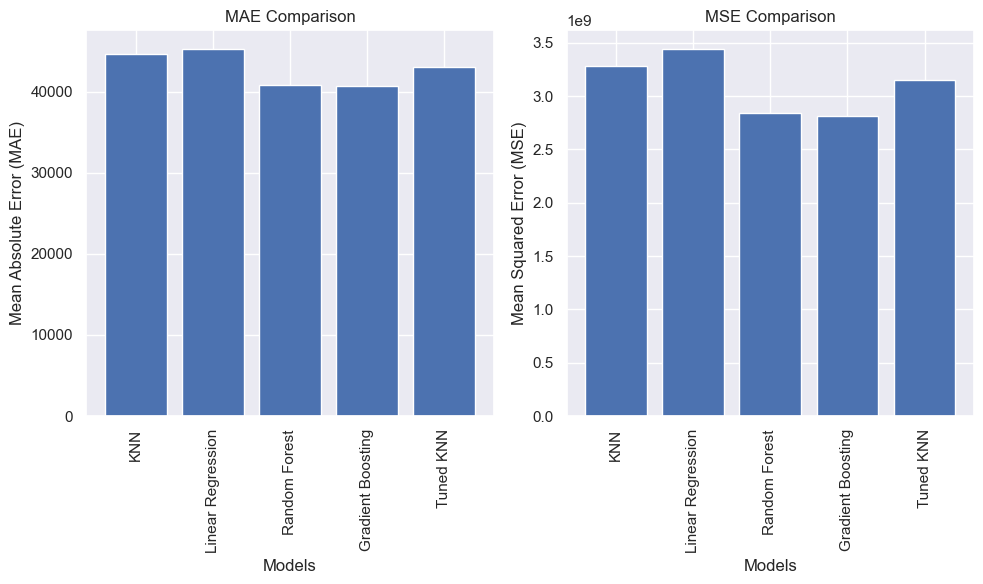

In [159]:
import matplotlib.pyplot as plt

models = ['KNN', 'Linear Regression', 'Random Forest', 'Gradient Boosting', 'Tuned KNN']
mae_scores = [mean_absolute_error(y_test, knn_preds),
              mean_absolute_error(y_test, lr_preds),
              mean_absolute_error(y_test, rf_preds),
              mean_absolute_error(y_test, gbr_preds),
              mean_absolute_error(y_test, best_preds)]

mse_scores = [mean_squared_error(y_test, knn_preds),
              mean_squared_error(y_test, lr_preds),
              mean_squared_error(y_test, rf_preds),
              mean_squared_error(y_test, gbr_preds),
              mean_squared_error(y_test, best_preds)]

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(models, mae_scores)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(models, mse_scores)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Based on the graph and the previous analysis, we can draw the following conclusions:

The Gradient Boosting Regressor and the Random Forest Regressor outperform the other models in terms of both MAE and MSE. They have the lowest error scores, indicating better predictive performance.

The Linear Regression model has the highest MAE and MSE, suggesting that it may not capture the complex relationships between the features and the target variable as effectively as the other models.

The KNN Regressor, both with default parameters and tuned parameters, performs slightly better than Linear Regression but not as well as the ensemble models (Random Forest and Gradient Boosting).

The feature importance analysis revealed that experience_level and job_title have the most significant impact on salary prediction, aligning with our domain knowledge.

Cross-validation provided a more robust estimate of the model's performance, confirming the effectiveness of the Random Forest Regressor across different subsets of the data.

